## Problem Statement : Singaporean athletes have difficulty winning gold medals in the Olympics because many are physically smaller and less experienced as compared to other countries.

* [Description of dataset](#chapter1)
* [Data Preprocessing](#chapter2)
* [Data Visualization](#chapter3)
    * [Age vs medallists and non-medallists](#chapter3_1)
    * [Height vs medallists and non-medallists](#chapter3_2)
    * [Weight vs medallists and non-medallists](#chapter3_3)
    * [Insights](#chapter3_4)
* [Training model](#chapter4)
* [Making new predictions](#chapter5)
* [Conclusion](#chapter6)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()
pd.set_option('display.max_columns', 100)

### Importing dataset

In [2]:
df = pd.read_csv("athlete_data.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


---

## Description of dataset <a class="anchor" id="chapter1"/>

In [4]:
df.shape

(271116, 15)

In [5]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

---
## Data Preprocessing <a class="anchor" id="chapter2"/>

1. Null values in columns `Age`, `Height` and `Weight` are dropped as missing values in these columns can affect the accuracy and validity of any analysis. 

2. Null values in Medal are filled with "None".

3. Columns `Sex`, `Season` and `Medal` are converted to categorical datatypes as they have very few unique values.
4. Convert all column names to uppercase for consistency

In [7]:
#Drop null values in Age, Height, Weight
df = df.dropna(subset=['Age', 'Height', 'Weight'])

In [8]:
# Fill NaN medals with 0
df["Medal"] = df["Medal"].astype(str).replace("nan", "None")

In [9]:
df.nunique()

ID        99088
Name      98546
Sex           2
Age          61
Height       94
Weight      217
Team        660
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        56
Event       590
Medal         4
dtype: int64

In [10]:
#Change medal,season,sex to category
cat_cols = ["Medal", "Season", "Sex", "NOC"]
for i in cat_cols: 
    df[i]=df[i].astype("category")

In [11]:
df.columns = df.columns.str.upper()

In [12]:
df.isnull().sum()

ID        0
NAME      0
SEX       0
AGE       0
HEIGHT    0
WEIGHT    0
TEAM      0
NOC       0
GAMES     0
YEAR      0
SEASON    0
CITY      0
SPORT     0
EVENT     0
MEDAL     0
dtype: int64

In [13]:
df.dtypes

ID           int64
NAME        object
SEX       category
AGE        float64
HEIGHT     float64
WEIGHT     float64
TEAM        object
NOC       category
GAMES       object
YEAR         int64
SEASON    category
CITY        object
SPORT       object
EVENT       object
MEDAL     category
dtype: object

In [14]:
# Remove duplicates
dups_df = df[df.duplicated(["TEAM", "NAME", "YEAR", "EVENT", "MEDAL", "CITY", "GAMES", "NOC", "HEIGHT"], keep = False)]
dups_df = dups_df[dups_df["SPORT"] != "Art Competitions"] 
dups_df #df of duplicates that is not in art competitions (will be dropped later)

,ID,NAME,SEX,AGE,HEIGHT,WEIGHT,TEAM,NOC,GAMES,YEAR,SEASON,CITY,SPORT,EVENT,MEDAL
212856,106878,Maurice Auguste Schills,M,20.0,188.0,83.0,France,FRA,1908 Summer,1908,Summer,London,Cycling,Cycling Men's Sprint,None
212857,106878,Maurice Auguste Schills,M,20.0,188.0,83.0,France,FRA,1908 Summer,1908,Summer,London,Cycling,Cycling Men's Sprint,None


### Art competitions can be removed since we are only interested in athletes
### After looking at unique values of teams, the teams `Serbia and Montenegro` and `Serbia` can be merged under `Serbia`

In [15]:
df = df.loc[df["SPORT"] != "Art Competitions"]  # Drop sport == "Art competition"
df = df.drop(index=[212856]) # Drop duplicated row 
df['TEAM'] = df['TEAM'].replace("Serbia and Montenegro", "Serbia") # change team name that is "Serbia and Montenegro" to "Serbia"

---

## Data Visualization <a class="anchor" id="chapter3"/>

In [16]:
df['SPORT'].value_counts() #Return counts for each unique sport

Athletics                    32374
Swimming                     18776
Gymnastics                   18271
Rowing                        7790
Cycling                       7774
Cross Country Skiing          7529
Shooting                      7260
Fencing                       6537
Alpine Skiing                 6322
Canoeing                      5550
Wrestling                     5186
Sailing                       4863
Biathlon                      4615
Ice Hockey                    4579
Equestrianism                 4553
Football                      4443
Speed Skating                 4400
Boxing                        4363
Hockey                        4264
Basketball                    3668
Judo                          3366
Handball                      3319
Volleyball                    3277
Weightlifting                 2974
Water Polo                    2719
Bobsleigh                     2205
Diving                        2011
Tennis                        2008
Ski Jumping         

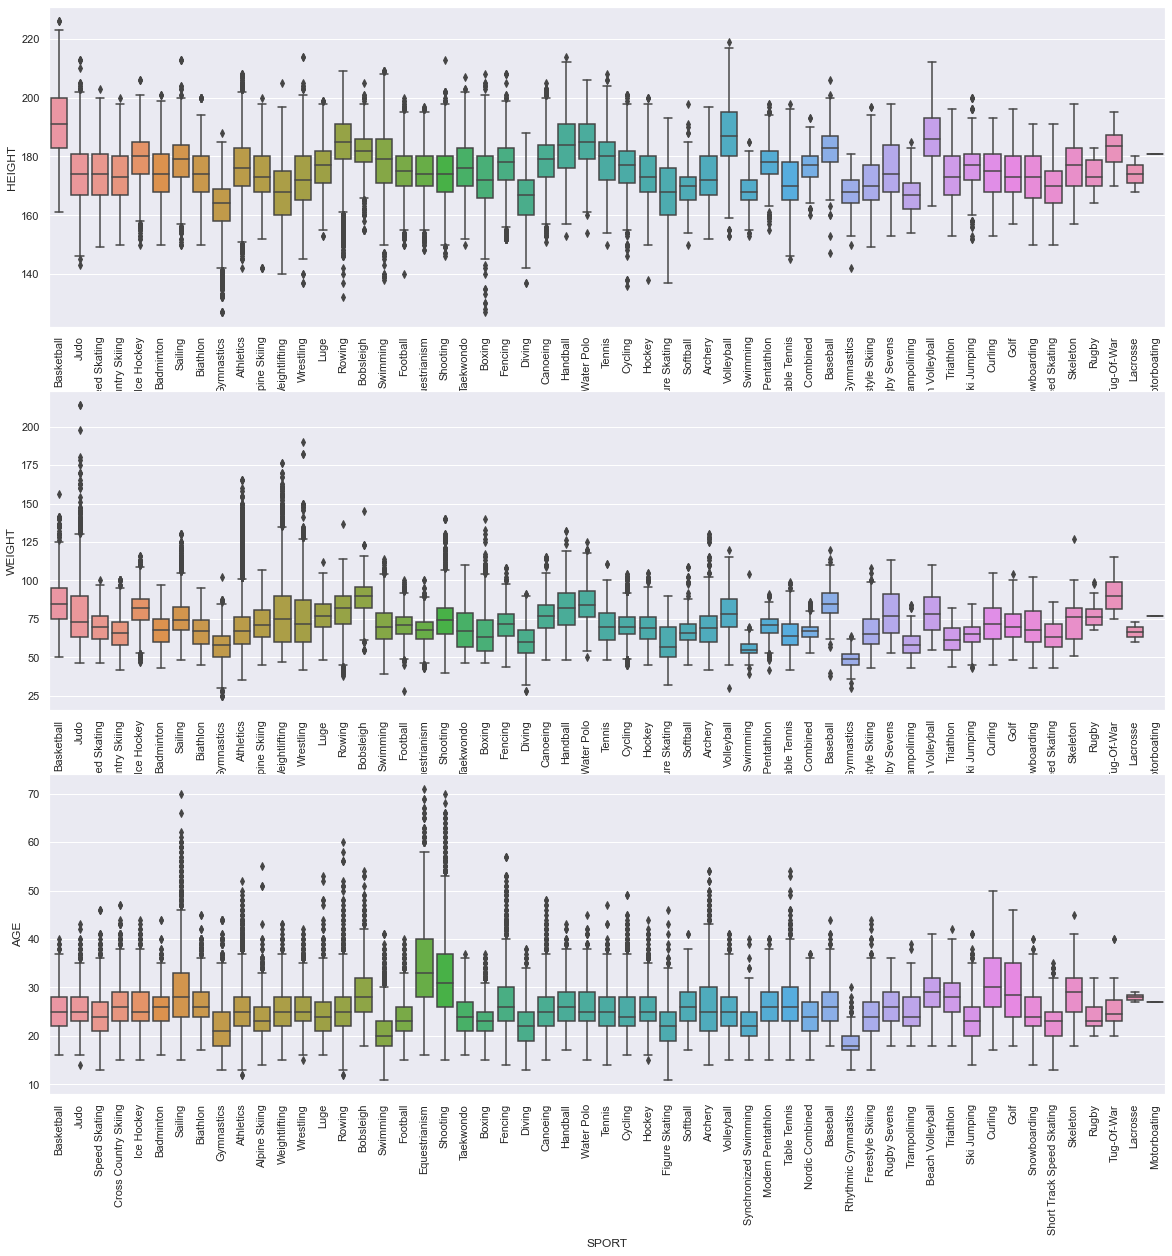

In [17]:
#distribution of height, weight and age for each sport
f, axes = plt.subplots(3,1, figsize=(20,20))
sb.boxplot(x ='SPORT', y="HEIGHT",data = df, ax=axes[0])
sb.boxplot(x ='SPORT', y="WEIGHT",data = df, ax=axes[1])
sb.boxplot(x ='SPORT', y="AGE",data = df, ax=axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

In [18]:
# All the unique sports in an array
sports_array = df["SPORT"].unique()

In [19]:
# Replace Bronze, Silver and Gold medalists to numerical value 1 to indicate medallists
# Replace None to numerical value 0 to indicate non-medallists
sports_df = df.copy()
sports_df["MEDALWON"] = sports_df["MEDAL"].apply(lambda x: "1" if x in ["Bronze", "Silver", "Gold"] else "0")

In [20]:
# Splitting dataset to medallist and non-medallists
non_medallists = sports_df[sports_df['MEDALWON']=='0']
medallists = sports_df[sports_df['MEDALWON']=='1']

### Finding differences between medallists and non-medallists

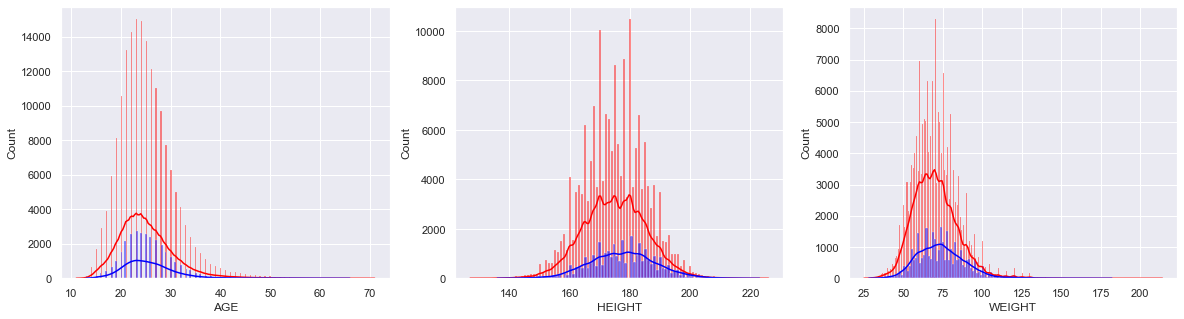

In [21]:
# Hist and KDE plot for age, height and weight
f, axes = plt.subplots(1,3, figsize=(20,5))
sb.histplot(data=non_medallists, x='AGE', color='red', kde=True, ax=axes[0])
sb.histplot(data=medallists, x='AGE', color='blue', kde=True, ax=axes[0])
sb.histplot(data=non_medallists, x='HEIGHT', color='red', kde=True, ax=axes[1])
sb.histplot(data=medallists, x='HEIGHT', color='blue', kde=True, ax=axes[1])
sb.histplot(data=non_medallists, x='WEIGHT', color='red', kde=True, ax=axes[2])
sb.histplot(data=medallists, x='WEIGHT', color='blue', kde=True, ax=axes[2])
plt.show()
# red represent non-medallists, blue represent medallists

### Analysis on age correlation with medallists and non-medallists for each sport <a class="anchor" id="chapter3_1"/>


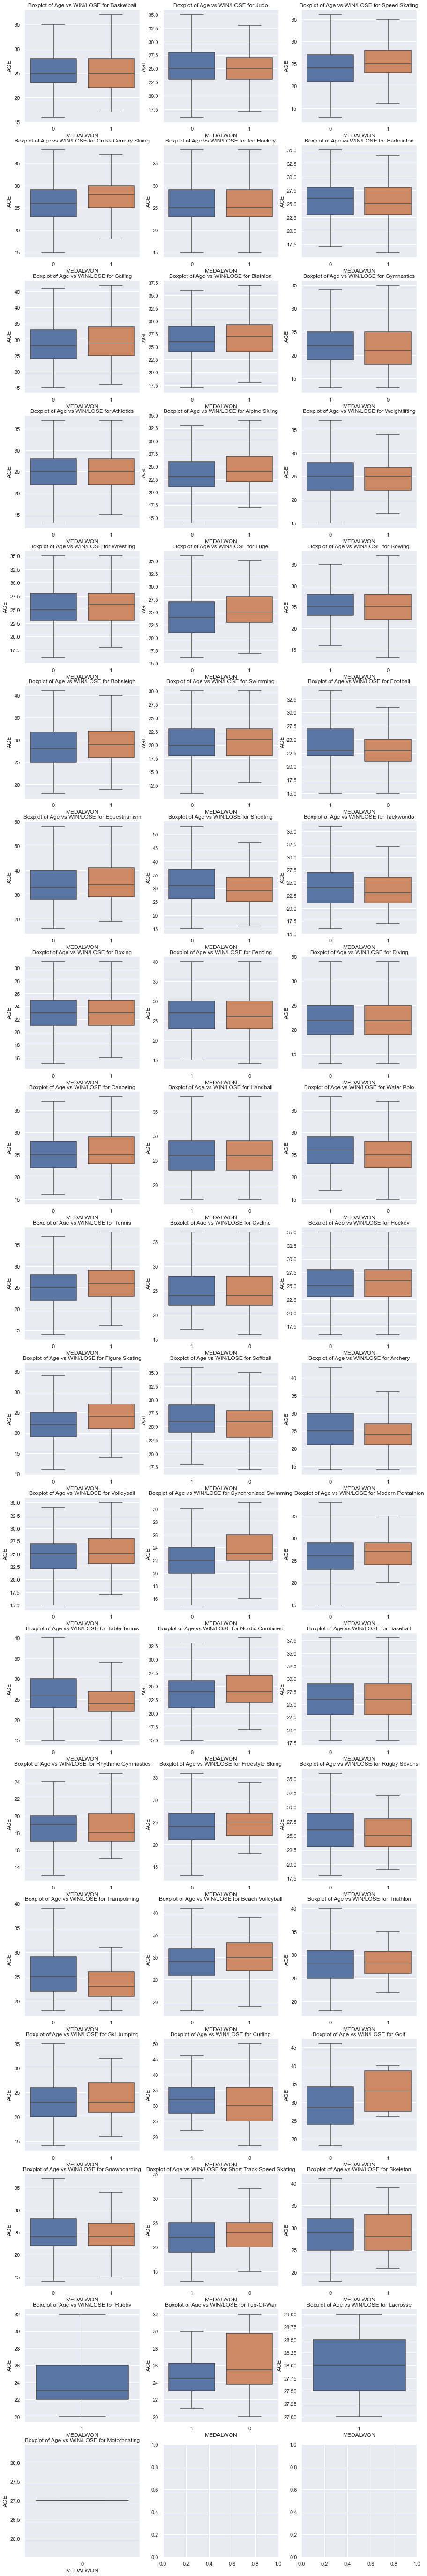

In [22]:
n_cols = 3
n_rows = len(sports_array)//n_cols + 1
f, axes = plt.subplots(n_rows,n_cols, figsize=(15,100))

for index, i in enumerate(sports_array):
    row = index // n_cols
    col = index % n_cols
    ax = axes[row][col]
    sport_df = sports_df[sports_df['SPORT'] == i]
    sb.boxplot(x ='MEDALWON', y="AGE",data = sport_df, ax = ax, showfliers = False )   
    ax.set_title("Boxplot of {} vs WIN/LOSE for {}".format("Age", i))

plt.show()


 <span style="color:red"> **From the box plots, the median age of winners is higher than the losers for many of the sports**


In [23]:
# Extract the median age for medallists and non-medallists
non_medallists_age = pd.DataFrame(non_medallists.groupby('SPORT')['AGE'].describe()['50%'])
medallists_age = pd.DataFrame(medallists.groupby('SPORT')['AGE'].describe()['50%'])

# Concat both df tgt and rename columns
median_age_df = pd.concat([medallists_age, non_medallists_age], axis = 1)
median_age_df.columns = ['Medallists Median Age', 'Non-Medallists Median Age']

# Create a new column Difference to tabulate value of difference in median age
median_age_df['Difference'] = median_age_df['Medallists Median Age'] - median_age_df['Non-Medallists Median Age']
median_age_df = median_age_df.sort_values(["Difference"], ascending = False)

# Display data (first 5 rows)
print("Table of comparison of median age for medallists and non-medallists")
display(median_age_df.head())

Table of comparison of median age for medallists and non-medallists


,Medallists Median Age,Non-Medallists Median Age,Difference
SPORT,,,
Golf,33.0,28.5,4.5
Cross Country Skiing,28.0,26.0,2.0
Curling,32.0,30.0,2.0
Figure Skating,24.0,22.0,2.0
Alpine Skiing,24.0,23.0,1.0


<span style="color:red">**From the above table, we will be able tell which athlete has a higher chance of winning that sport if he is older.**

<span style="color:red"> `NaN` means that no athlete in that sport has win/lost in the dataset provided

### Analysis on height correlation with winning for each sport <a class="anchor" id="chapter3_2"/>

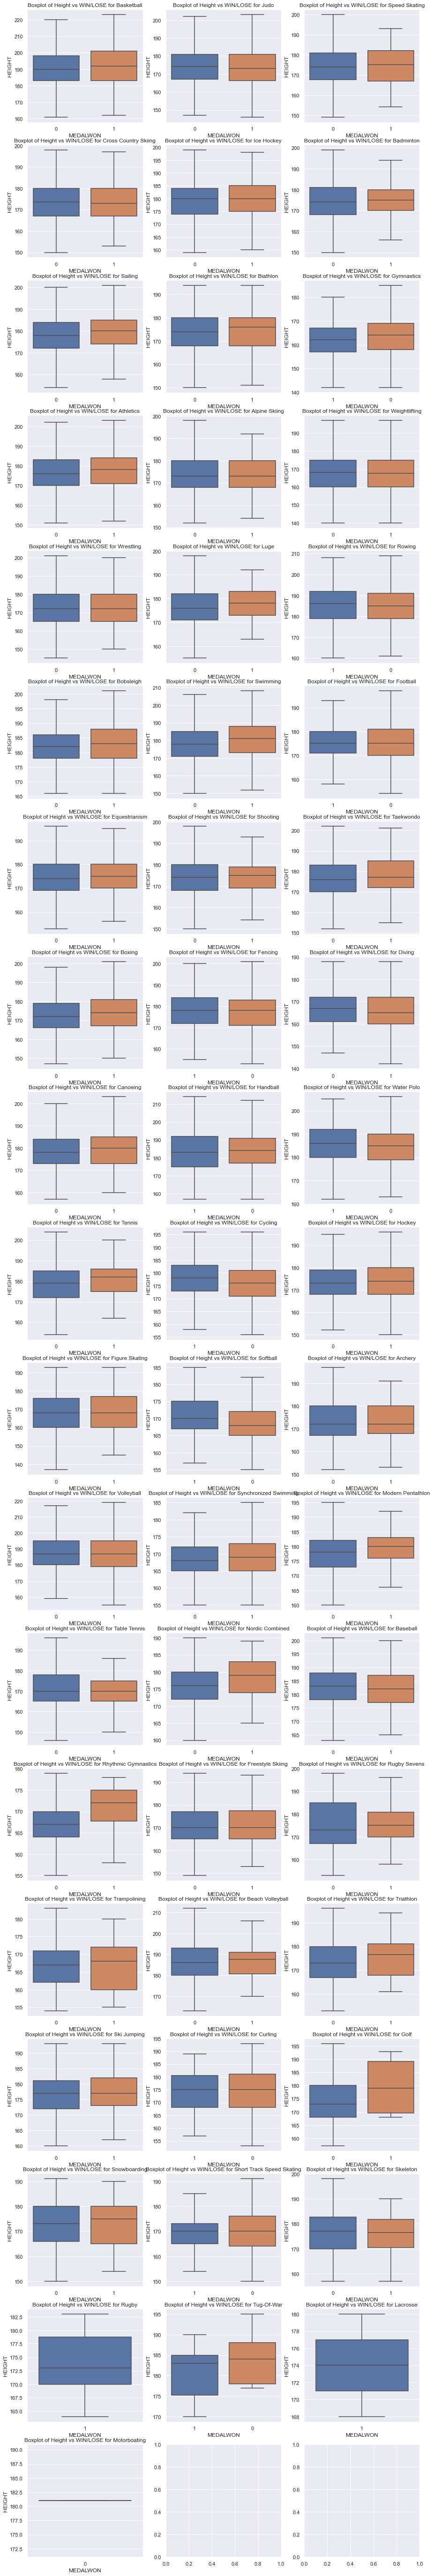

In [24]:
n_cols = 3
n_rows = len(sports_array)//n_cols + 1
f, axes = plt.subplots(n_rows,n_cols, figsize=(15,100))

for index, i in enumerate(sports_array):
    row = index // n_cols
    col = index % n_cols
    ax = axes[row][col]
    sport_df = sports_df[sports_df['SPORT'] == i]
    sb.boxplot(x ='MEDALWON', y="HEIGHT",data = sport_df, ax = ax, showfliers = False )   
    ax.set_title("Boxplot of {} vs WIN/LOSE for {}".format("Height", i))

plt.show()

In [25]:
# Extract the median height for medallists and non-medallists
non_medallists_height = pd.DataFrame(non_medallists.groupby('SPORT')['HEIGHT'].describe()['50%'])
medallists_height = pd.DataFrame(medallists.groupby('SPORT')['HEIGHT'].describe()['50%'])

# Concat both df tgt and rename columns
median_height_df = pd.concat([medallists_height, non_medallists_height], axis = 1)
median_height_df.columns = ['Medallists Median Height', 'Non-Medallists Median Height']

# Create a new column Difference to tabulate value of difference in median height
median_height_df['Difference'] = median_height_df['Medallists Median Height'] - median_height_df['Non-Medallists Median Height']
median_height_df = median_height_df.sort_values(["Difference"], ascending = False)

# Display data (first 5 rows)
print("Table of comparison of median height for medallista and non-medallists")
display(median_height_df.head())

Table of comparison of median height for medallista and non-medallists


,Medallists Median Height,Non-Medallists Median Height,Difference
SPORT,,,
Golf,179.0,173.0,6.0
Rhythmic Gymnastics,172.0,167.0,5.0
Triathlon,176.5,173.0,3.5
Tennis,182.0,179.0,3.0
Nordic Combined,179.0,176.0,3.0


### Analysis on weight correlation with winning for each sport <a class="anchor" id="chapter3_3"/>

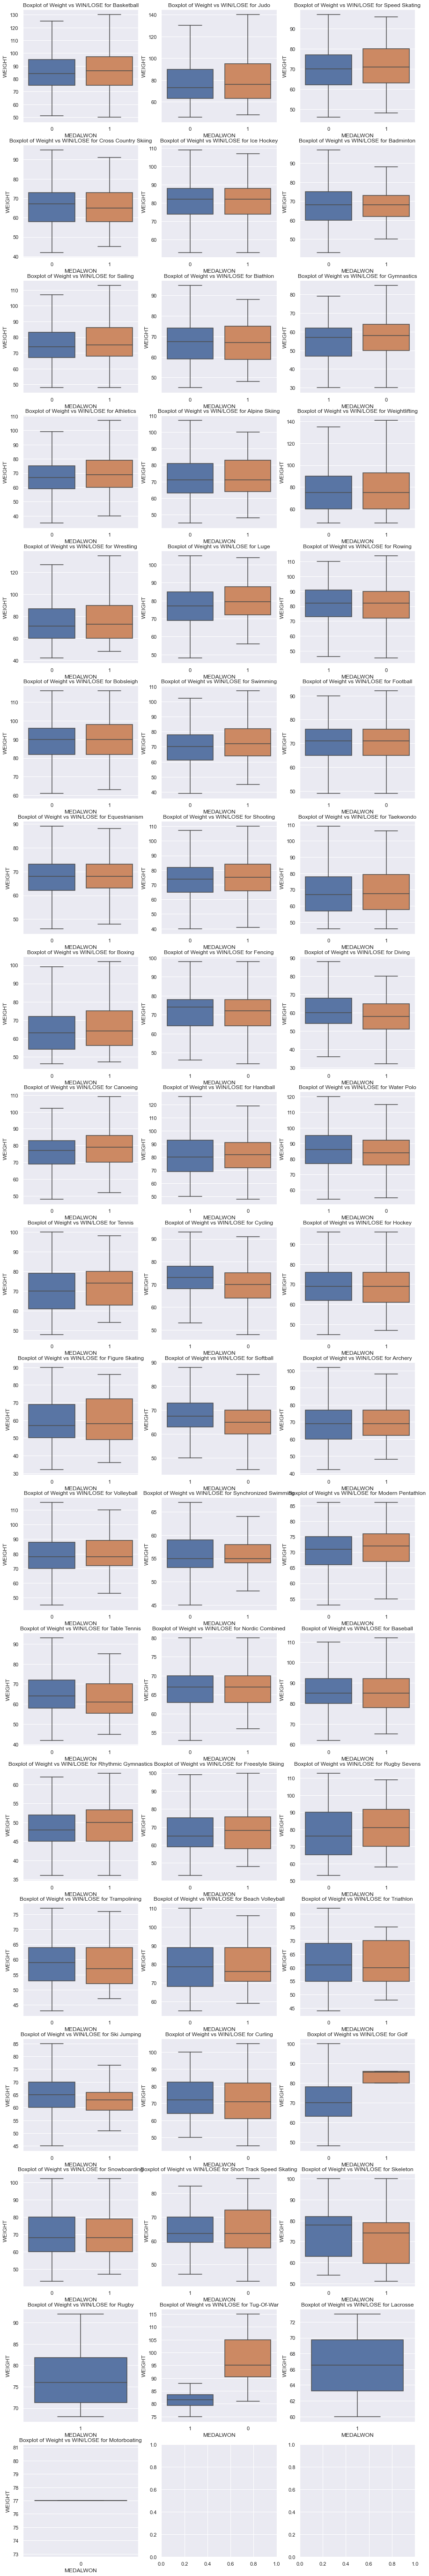

In [26]:
n_cols = 3
n_rows = len(sports_array)//n_cols + 1
f, axes = plt.subplots(n_rows,n_cols, figsize=(15,100))

for index, i in enumerate(sports_array):
    row = index // n_cols
    col = index % n_cols
    ax = axes[row][col]
    sport_df = sports_df[sports_df['SPORT'] == i]
    sb.boxplot(x ='MEDALWON', y="WEIGHT",data = sport_df, ax = ax, showfliers = False )   
    ax.set_title("Boxplot of {} vs WIN/LOSE for {}".format("Weight", i))

plt.show()

In [27]:
# Extract the median weight for medallists and non-medallists
non_medallists_weight = pd.DataFrame(non_medallists.groupby('SPORT')['WEIGHT'].describe()['50%'])
medallists_weight = pd.DataFrame(medallists.groupby('SPORT')['WEIGHT'].describe()['50%'])

# Concat both df tgt and rename columns
median_weight_df = pd.concat([medallists_weight, non_medallists_weight], axis = 1)
median_weight_df.columns = ['Medallists Median Weight', 'Non-Medallists Median Weight']

# Create a new column Difference to tabulate value of difference in median weight
median_weight_df['Difference'] = median_weight_df['Medallists Median Weight'] - median_weight_df['Non-Medallists Median Weight']
median_weight_df = median_weight_df.sort_values(["Difference"], ascending = False)

# Display data (first 5 rows)
print("Table of comparison of median weight for medallista and non-medallists")
display(median_weight_df.head())

Table of comparison of median weight for medallista and non-medallists


,Medallists Median Weight,Non-Medallists Median Weight,Difference
SPORT,,,
Golf,85.5,70.0,15.5
Rugby Sevens,81.0,76.0,5.0
Tennis,74.0,70.0,4.0
Cycling,73.0,70.0,3.0
Judo,76.0,73.0,3.0


## Insights <a class="anchor" id="chapter3_4"/>

- The sport `swimming` is **second highest in count** and has **no rules for weight category**, making the comparison of physical build fair and thus chosen for further analysis. 

- Age, height and weight boxplots for medallists and non-medallists does show that **medallists are generally older, taller and heavier for swimmers**.

In [28]:
sports_df2 = sports_df.copy()

# Extract all the swimmers
swimmer_df = sports_df2[sports_df2['SPORT']=='Swimming']

# Extract all the unique swimmers name into an array
swimmer_names = list(swimmer_df['NAME'].unique())
swimmer_names.sort() 

---

# Using sex, age, height and weight, predict swimmers that will get Gold medal <a class="anchor" id="chapter4"/>

- Extract only the winners
- We know what differentiates a winner from loser (above parameters). To know who will dominate the sport, we shall differentiate the Gold medalist from other winners.
- Train a model that will predict a Gold medalist if given the above parameters of a swimmer
- Predict if a person will be Gold medalist swimmer

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [30]:
# Extract swimmers medallists only
swimmer_df = sports_df[sports_df['SPORT']=='Swimming']
swimmer_df_medallist = swimmer_df[swimmer_df["MEDAL"].isin(["Bronze", "Silver", "Gold"])]
swimmer_df_medallist["MEDAL"] = swimmer_df_medallist["MEDAL"].astype("O")
swimmer_df_medallist["MEDAL"] = swimmer_df_medallist["MEDAL"].astype("category")

C:\Users\limch\AppData\Local\Temp/ipykernel_25552/3349297921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimmer_df_medallist["MEDAL"] = swimmer_df_medallist["MEDAL"].astype("O")
C:\Users\limch\AppData\Local\Temp/ipykernel_25552/3349297921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimmer_df_medallist["MEDAL"] = swimmer_df_medallist["MEDAL"].astype("category")


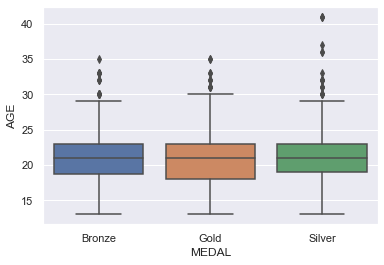

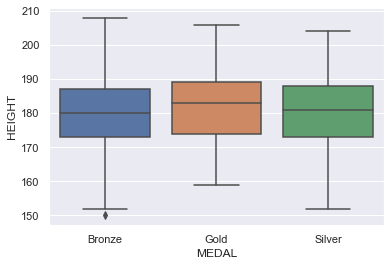

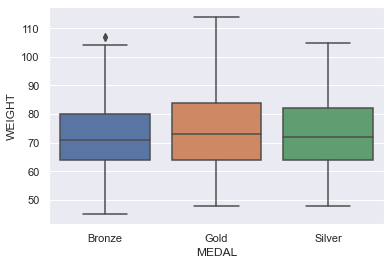

In [31]:
# Visualizing distribution of age, height and weight with swimmers medallists 
for index, var in enumerate(["AGE", "HEIGHT", "WEIGHT"]):
    sb.boxplot(x ='MEDAL', y = var ,data = swimmer_df_medallist)   
    plt.show()

**We observe that median Age is same for all medal types, while median Height and Weight are higher for gold medallists**

In [32]:
# Convert medal column to Gold or Non Gold medallists
swimmer_df_medallist.loc[:, "MEDAL"] = swimmer_df_medallist["MEDAL"].apply(lambda x: "Gold" if x == "Gold" else "No Gold")
swimmer_df_medallist = swimmer_df_medallist.sort_values('MEDAL').reset_index().drop(["index"], axis=1)

# Extracting only required variables
swimmer_df_medallist = swimmer_df_medallist[['AGE','HEIGHT','SEX','WEIGHT','MEDAL']].reset_index().drop(["index"], axis=1)

# Split SEX column to two new MALE and FEMALE column
swimmer_df_medallist["MALE"] = swimmer_df_medallist['SEX'].apply(lambda x: 1 if x == "M" else 0)
swimmer_df_medallist["FEMALE"] = swimmer_df_medallist['SEX'].apply(lambda x: 1 if x == "F" else 0)

# Drop SEX column
swimmer_df_medallist = swimmer_df_medallist.drop(["SEX"], axis=1).reset_index().drop(["index"], axis=1)

# Display final dataframe
swimmer_df_medallist.head()

C:\Users\limch\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,AGE,HEIGHT,WEIGHT,MEDAL,MALE,FEMALE
0,23.0,195.0,82.0,Gold,1,0
1,20.0,201.0,88.0,Gold,1,0
2,20.0,201.0,88.0,Gold,1,0
3,24.0,188.0,88.0,Gold,1,0
4,24.0,201.0,88.0,Gold,1,0


In [33]:
# using train_test_split to split dataset 
X = swimmer_df_medallist[["AGE", "HEIGHT","WEIGHT", "MALE","FEMALE"]]
y = swimmer_df_medallist["MEDAL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [34]:
# Testing max_depths to find best accuracy for training data set
depth_accuracy_train = []
depth_accuracy_test = []
depth_range = range(1,50)
prev = 0

for depth in depth_range:
    # Instantiating model and fitting training dataset
    tree_model = DecisionTreeClassifier(max_depth = depth)
    tree_model.fit(X_train, y_train)        
    
    # Computes accuracy of model on training and testing datasets
    acc_train = tree_model.score(X_train, y_train)
    acc_test = tree_model.score(X_test, y_test)
    depth_accuracy_train.append(acc_train)
    depth_accuracy_test.append(acc_test)
    
    if acc_train == prev:
        break
    
    prev = acc_train

# Displaying results in table form
acc_df = pd.DataFrame({"Max Depth": range(1,depth+1), "Training Data Accuracy": depth_accuracy_train, "Testing Data Accuracy": depth_accuracy_test})
acc_df.sort_values(["Training Data Accuracy"], ascending = False).head(3) 

,Max Depth,Training Data Accuracy,Testing Data Accuracy
24,25,0.866416,0.623794
23,24,0.866416,0.618971
22,23,0.865343,0.602894


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.865343347639485

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6189710610932476



<AxesSubplot:>

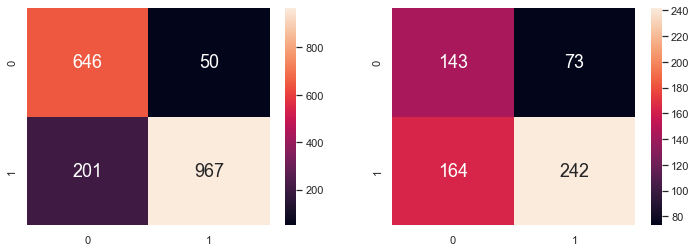

In [35]:
maxdepth = depth - 1

# Creating decision tree object with the found maxdepth
dectree = DecisionTreeClassifier(max_depth = maxdepth)  
dectree.fit(X_train, y_train)                   

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

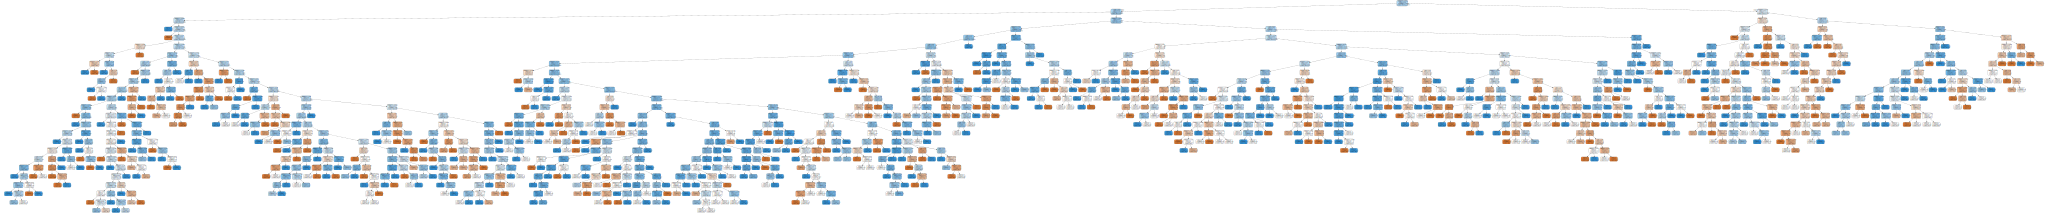

In [36]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

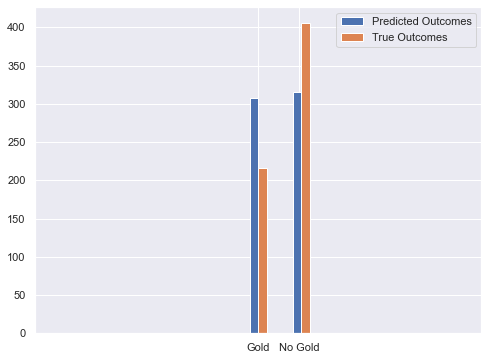

In [37]:
# Hist plot of predicted outcomes vs true outcomes
plt.figure(figsize=(8,6))
bins = np.linspace(-5,5, 20)
plt.hist([y_test_pred, y_test], bins=bins, label=['Predicted Outcomes', 'True Outcomes'])
plt.legend(loc='upper right')
plt.show()

In [38]:
# computation of fpr and fnr
class_acc_score_train = dectree.score(X_train, y_train)
class_acc_score_test = dectree.score(X_test, y_test)
tree_depth = dectree.get_depth()
tree_number_leaves = dectree.get_n_leaves()
Score_Tables=[]

[tn_train, fp_train, fn_train, tp_train] = confusion_matrix(y_train, y_train_pred).ravel()
[tn_test, fp_test, fn_test, tp_test] = confusion_matrix(y_test, y_test_pred).ravel()

if fp_train+tn_train!=0: # if the denominator of the rate computation is not equal to 0
    fpr_train = round(fp_train/(fp_train+tn_train),3) # round up to 3 decimal places
else:
    fpr_train = "N.A."

if fp_train+tn_train!=0:
    tnr_train = round(tn_train/(fp_train+tn_train),3)
else:
    tnr_train = "N.A."

if fn_train+tp_train!=0:
    tpr_train = round(tp_train/(fn_train+tp_train),3)
else:
    tpr_train = "N.A."
    
if fn_train+tp_train!=0:
    fnr_train = round(fn_train/(fn_train+tp_train),3)
else:
    fnr_train = "N.A." 
    

if fp_test+tn_test!=0: # if the denominator of the rate computation is not equal to 0
    fpr_test = round(fp_test/(fp_test+tn_test),3) # round up to 3 decimal places
else:
    fpr_test = "N.A."

if fp_test+tn_test!=0:
    tnr_test = round(tn_test/(fp_test+tn_test),3)
else:
    tnr_test = "N.A."

if fn_test+tp_test!=0:
    tpr_test = round(tp_test/(fn_test+tp_test),3)
else:
    tpr_test = "N.A."
    
if fn_test+tp_test!=0:
    fnr_test = round(fn_test/(fn_test+tp_test),3)
else:
    fnr_test = "N.A."

# store values for comparison later
# Temp variable to store all the 3 values per scenario
Temp = ['(Train)', round(class_acc_score_train,3),tpr_train,fpr_train,tnr_train,fnr_train,tree_depth,tree_number_leaves]
Score_Tables.append(Temp) # add into the empty list each time
Temp2 = ['(Test)',round(class_acc_score_test,3),tpr_test,fpr_test,tnr_test,fnr_test,tree_depth,tree_number_leaves]
Score_Tables.append(Temp2) # add into the empty list each time

# display of all scores and values per scenario
# Convert List to DataFrame format in order to display better
Score_DataFrame = pd.DataFrame(Score_Tables)
# Name the columns of the new dataframe
Score_DataFrame.columns = ['Scenario', 'AccScore', 'tpr','fpr','tnr','fnr','tree depths','number of tree leaves']
Score_DataFrame 

,Scenario,AccScore,tpr,fpr,tnr,fnr,tree depths,number of tree leaves
0,(Train),0.865,0.828,0.072,0.928,0.172,24,713
1,(Test),0.619,0.596,0.338,0.662,0.404,24,713


---
 
## Prediction with new data values <a class="anchor" id="chapter5"/>
<span style="color:red"> So can our model accurately predict whether the Singaporean swimmers win Gold in the olympics based on the 2016 Rio Olympics data?

- Extracted SG swimmer data to predict Gold medal. 
    - **Joseph schooling is a must since he is the only one with gold**

In [39]:
#Extracted some swimmers base on recent particpation in Olympics
selected_swimmers = ['Joseph Isaac Schooling', 'Quah Ting Wen', 'Quah Zheng Wen', 'Fong Jock "David" Lim', 'Shu En "Lynette" Lim', 'Ng Yue Meng' ]

#Extracting singapore swimmers dataframe base on above name list
sg_swimmers_df = sports_df[(sports_df['SPORT']=='Swimming') & (sports_df2['TEAM']=='Singapore')]
sg_swimmers_df = sg_swimmers_df.loc[sg_swimmers_df["NAME"].isin(selected_swimmers),:]
sg_swimmers_df = sg_swimmers_df.drop_duplicates(subset= ["NAME", "SEX","AGE","HEIGHT","WEIGHT","TEAM"], keep = "last")

In [40]:
swimmers_index_array = sg_swimmers_df.index

# Extracting X (input) and y (outputs) dataframe
sg_swimmers_df_X = sg_swimmers_df.loc[sg_swimmers_df.index.isin(swimmers_index_array), ["SEX", "AGE", "HEIGHT","WEIGHT"]]
sg_swimmers_df_y = sg_swimmers_df.loc[sg_swimmers_df.index.isin(swimmers_index_array), ["MEDAL"]]

# Transforming y dataset
sg_swimmers_df_y["MEDAL"] = sg_swimmers_df_y["MEDAL"].apply(lambda x: x if x == "Gold" else "No Gold")

# Transforming X dataset
sg_swimmers_df_X["MALE"] = sg_swimmers_df_X['SEX'].apply(lambda x: 1 if x == "M" else 0)
sg_swimmers_df_X["FEMALE"] = sg_swimmers_df_X['SEX'].apply(lambda x: 1 if x == "F" else 0)
sg_swimmers_df_X = sg_swimmers_df_X.drop(["SEX"], axis=1).reset_index().drop(["index"], axis=1)

In [41]:
# Predicting using the selected data values
pred = pd.Series(dectree.predict(sg_swimmers_df_X))

# Comparing the predicted values vs actual
actual = sg_swimmers_df_y.reset_index().drop(["index"], axis=1)
final = pd.concat([sg_swimmers_df_X, actual, pred], axis = 1)
final = final.rename(columns={"MEDAL": 'Actual', 0: 'Predicted'})
final

,AGE,HEIGHT,WEIGHT,MALE,FEMALE,Actual,Predicted
0,17.0,180.0,75.0,1,0,No Gold,Gold
1,22.0,180.0,75.0,1,0,No Gold,No Gold
2,16.0,162.0,52.0,0,1,No Gold,No Gold
3,20.0,162.0,52.0,0,1,No Gold,No Gold
4,18.0,179.0,72.0,1,0,No Gold,No Gold
5,15.0,175.0,60.0,0,1,No Gold,Gold
6,23.0,175.0,60.0,0,1,No Gold,No Gold
7,15.0,179.0,79.0,1,0,No Gold,No Gold
8,19.0,179.0,79.0,1,0,No Gold,No Gold
9,17.0,184.0,74.0,1,0,No Gold,Gold


In [42]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(sg_swimmers_df_X)

# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProbLegend"], index = final.index)
proba_df = pd.concat([final, y_prob], axis = 1)

proba_df

,AGE,HEIGHT,WEIGHT,MALE,FEMALE,Actual,Predicted,ProbLegend
0,17.0,180.0,75.0,1,0,No Gold,Gold,0.000000
1,22.0,180.0,75.0,1,0,No Gold,No Gold,1.000000
2,16.0,162.0,52.0,0,1,No Gold,No Gold,1.000000
3,20.0,162.0,52.0,0,1,No Gold,No Gold,1.000000
4,18.0,179.0,72.0,1,0,No Gold,No Gold,0.666667
5,15.0,175.0,60.0,0,1,No Gold,Gold,0.500000
6,23.0,175.0,60.0,0,1,No Gold,No Gold,1.000000
7,15.0,179.0,79.0,1,0,No Gold,No Gold,1.000000
8,19.0,179.0,79.0,1,0,No Gold,No Gold,1.000000
9,17.0,184.0,74.0,1,0,No Gold,Gold,0.000000


In [43]:
# Prediction probabilities if 0 represent Gold and 1 represent No Gold
dectree.classes_

array(['Gold', 'No Gold'], dtype=object)

# Conclusion <a class="anchor" id="chapter6"/>

- Looking at the prediction for Singapore, having younger age gives advantage to winning Gold instead of being older
- Height and Weight does gives advantage to winning gold (compare index 4 with 10)